In [39]:
from tensorflow.keras.models import load_model
import numpy as np
from collections import Counter
from PQmodel import PQ,build_data
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score


In [5]:
model = load_model("modelo_cnn.h5")

In [68]:
Muestras=500
Prueba = PQ(Cicles=10,PeriodoDisturbio=10,InicioDisturbio=0,FS=3841)
datosp = Prueba.PQaleatorio(Muestras)

In [69]:
ddp,targetp = build_data(datosp,cs=640)

In [70]:
resultado = model.predict(ddp)

454/454 [==============================] - 6s 14ms/step


In [71]:
resultado.shape

(14500, 29)

In [72]:
def CrearCMdata(resultad,Muestras):
    yp,y=[],[]
    for k in range(Muestras):
        for v in range(29):
            senal=v
            y.append(v)
            yp.append(list(resultad[senal]).index(np.max(resultad[senal])))
    return np.array(y),np.array(yp)

In [73]:
t,tp=CrearCMdata(resultado,Muestras)
cmt =confusion_matrix(t,tp) 
f1_score(tp,t,average='weighted')

0.9425287356321839

<Axes: >

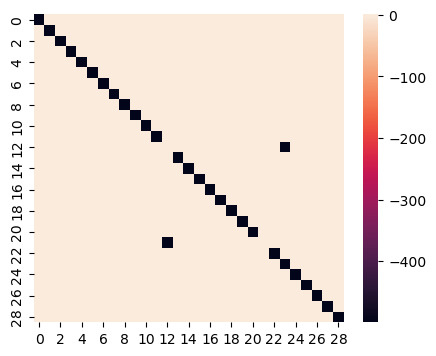

In [74]:
fig, ax = plt.subplots(figsize=(5,4))
heatmap(1-cmt, ax=ax)

In [75]:
cmt.shape

(29, 29)

In [81]:
model = load_model("modelo_cnn1C.h5")

In [82]:
Muestras=500
Prueba = PQ(Cicles=1,PeriodoDisturbio=1,InicioDisturbio=0,FS=3841)
datosp = Prueba.PQaleatorio(Muestras)

In [83]:
ddp,targetp = build_data(datosp,cs=64)

In [84]:
resultado = model.predict(ddp)

454/454 [==============================] - 1s 2ms/step


In [85]:
resultado.shape

(14500, 29)

In [86]:
t,tp=CrearCMdata(resultado,Muestras)
cmt =confusion_matrix(t,tp) 
f1_score(tp,t,average='weighted')

0.9310344827586206

<Axes: >

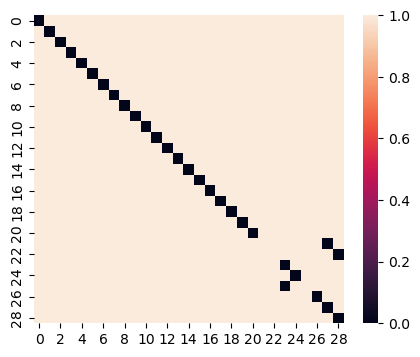

In [93]:
fig, ax = plt.subplots(figsize=(5,4))
heatmap(1-cmt/np.bincount(t), ax=ax)

array([0.33219281, 0.33219281, 0.33219281, 0.33219281, 0.33219281])